# 2D Plot in Python


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

square = np.array([[0,0],[20,0],[20,10],[0,10],[0,0]])

print("Square coordinat : \r\n",square)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.plot(square[:,0], square[:,1], 'g-', linewidth=3)

Square coordinat : 
 [[ 0  0]
 [20  0]
 [20 10]
 [ 0 10]
 [ 0  0]]


# Basic Kinematic

In [2]:
def degreeToRad(deg):
    return deg*math.pi/180

In [3]:
print(degreeToRad(90))

1.5707963267948966


In [4]:
def radToDegree(rad):
    return rad*180/math.pi

In [5]:
print(radToDegree(1))

57.29577951308232


In [6]:
def polarToCart(l, theta):
    return np.array([l*math.cos(degreeToRad(theta)),l*math.sin(degreeToRad(theta))])

In [7]:
print(polarToCart(10,45))

[7.07106781 7.07106781]


In [8]:
def cartToPolar(x, y):
    l = math.sqrt(x**2 + y**2)
    theta = radToDegree(math.atan2(y,x))
    return l, theta

In [9]:
print(cartToPolar(10,10))

(14.142135623730951, 45.0)


# 1 DOF Arm Robot

In [10]:
def createArm(npInitJoint, l, theta):
    arm = np.zeros((2,2))
    """
    jointPos = joint position in catesian space (x,y)
    l = length of robot arm
    theta = angle of robot arm (degree)
    function will return 2D graphic position of robot arm
    """
    arm[0,0] = npInitJoint[0]
    arm[0,1] = npInitJoint[1]
    arm[1,:] = polarToCart(l,theta)
    return arm
    

Arm coordinat : 
 [[ 0.  0.]
 [10.  0.]]


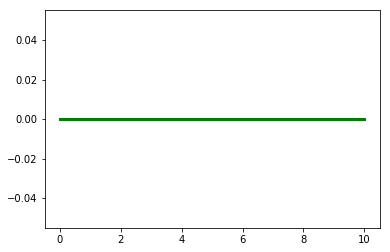

In [11]:
armLength = 10
armAngle = 0
arm = createArm(np.array([0,0]), armLength, armAngle)

print("Arm coordinat : \r\n",arm)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(arm[:,0], arm[:,1], 'g-', linewidth=3)



# ARM Movement

Arm coordinat : 
 [[ 0.  0.]
 [10.  0.]]


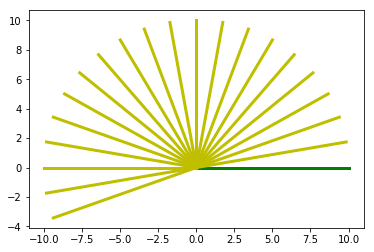

In [12]:
print("Arm coordinat : \r\n",arm)   
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(arm[:,0], arm[:,1], 'g-', linewidth=3)
'Move arm 10 degree'

for i in range(0,20):
    armAngle += 10
    armNextPos = createArm(np.array([0,0]), armLength, armAngle)     
    ax1.plot(armNextPos[:,0], armNextPos[:,1], 'y-', linewidth=3)

# Rotation Matrix

In [13]:
def createRotMatrix(theta):
    rotMat = np.zeros((2,2))
    rotMat[0,0] = math.cos(degreeToRad(theta))
    rotMat[0,1] = -1 * math.sin(degreeToRad(theta))
    rotMat[1,0] = math.sin(degreeToRad(theta))
    rotMat[1,1] = math.cos(degreeToRad(theta))
    return rotMat

In [14]:
print(createRotMatrix(90))

[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]


In [15]:
def rotationZ( theta ):
    return np.array([ [ math.cos(theta), - math.sin(theta) ], [ math.sin(theta), math.cos(theta) ] ] )

Arm coordinat initial : 
 [[ 0.  0.]
 [10.  0.]]


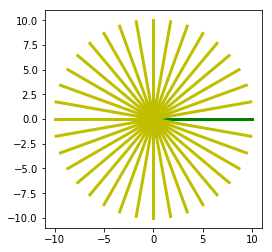

In [16]:
armLength = 10
armAngle = 0
arm = createArm(np.array([0,0]), armLength, armAngle)

print("Arm coordinat initial : \r\n",arm)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_aspect("equal")
ax1.plot(arm[:,0], arm[:,1], 'g-', linewidth=3)

for i in range(0,35):
    armAngle += 10
    R = createRotMatrix(armAngle)

    armNextPos = R.dot(arm.T)
    'print("Arm coordinat",i+1,": \r\n",armNextPos)'
    ax1.plot(armNextPos[0,:], armNextPos[1,:], 'y-', linewidth=3)


# 3D Rotation and Translation

https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

$$\begin{pmatrix}a & b\\\ c & d\end{pmatrix}$$

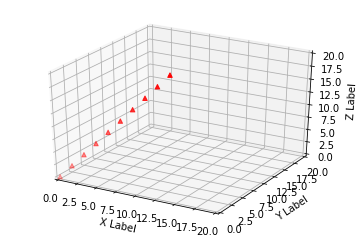

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Create 3D plot in Matplotlib
fig = plt.figure()
ax = plt.axes(projection='3d')

# Define Label in Axis X, Y, Z
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
ax.set_zlim(0, 20)

# 3D Data to Plot in X, Y, Z
# Create 5 random int datas from numpy in range 0-10
# zline = np.random.randint(0,10,(5))
# xline = np.random.randint(0,10,(5))
# yline = np.random.randint(0,10,(5))
xdata = np.arange(0,10)
ydata = np.arange(0,10)
zdata = np.arange(0,20,2)

ax.scatter3D(xdata, ydata, zdata, c='red', marker='^');

plt.show()

## 1. Rotation & Translation Matrix in 3D

In [18]:
def create3DRotMat(axis, theta):
    if axis == "x" :
        return np.array([[1,0,0,0],[0,math.cos(theta),-math.sin(theta),0],[0,math.sin(theta),math.cos(theta),0],[0,0,0,1]])
    elif axis == "y" :
        return np.array([[math.cos(theta),0,math.sin(theta),0],[0,1,0,0],[-math.sin(theta),0,math.cos(theta),0],[0,0,0,1]])
    elif axis == "z" :
        return np.array([[math.cos(theta),-math.sin(theta),0,0],[math.sin(theta),math.cos(theta),0,0],[0,0,1,0],[0,0,0,1]])

In [19]:
create3DRotMat("x",90/180*math.pi)

array([[ 1.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  6.123234e-17, -1.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  6.123234e-17,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]])

In [84]:
def create3DTransMat(vx, vy, vz):
    return np.array([[1,0,0,vx],[0,1,0,vy],[0,0,1,vz],[0,0,0,1]])

In [21]:
def drawCoordinateSystem(ax, scale=1.0, A=np.eye(4), style='-'):
    xaxis = np.array( [ [ 0, 0, 0, 1 ], [ scale, 0, 0, 1 ] ] ).T
    yaxis = np.array( [ [ 0, 0, 0, 1 ], [ 0, scale, 0, 1 ] ] ).T
    zaxis = np.array( [ [ 0, 0, 0, 1 ], [ 0, 0, scale, 1 ] ] ).T
    print(xaxis, yaxis, zaxis )
    
    xc = A.dot( xaxis )
    yc = A.dot( yaxis )
    zc = A.dot( zaxis )
    
    print( xc, yc, zc )
    ax.plot( xc[0,:], xc[1,:], xc[2,:], 'r' + style )
    ax.plot( yc[0,:], yc[1,:], yc[2,:], 'g' + style )
    ax.plot( zc[0,:], zc[1,:], zc[2,:], 'b' + style )

Before Translate
[[ 1  0  0 15]
 [ 0  1  0 10]
 [ 0  0  1  0]
 [ 0  0  0  1]]
[[ 0.         14.14213562]
 [ 0.         14.14213562]
 [ 0.          0.        ]
 [ 1.          1.        ]]
[[  0.         -14.14213562]
 [  0.          14.14213562]
 [  0.           0.        ]
 [  1.           1.        ]]
[[ 0.  0.]
 [ 0.  0.]
 [ 0. 20.]
 [ 1.  1.]]
After Translate
[[15.         29.14213562]
 [10.         24.14213562]
 [ 0.          0.        ]
 [ 1.          1.        ]]
[[15.          0.85786438]
 [10.         24.14213562]
 [ 0.          0.        ]
 [ 1.          1.        ]]
[[15. 15.]
 [10. 10.]
 [ 0. 20.]
 [ 1.  1.]]


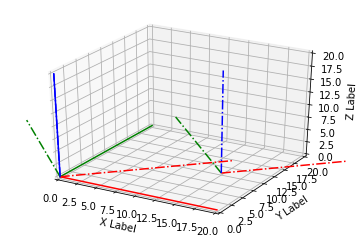

In [98]:
# Already Tested
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import math

def drawCoordinateSystem( ax, scale=1.0, A = np.eye(4), style='-' ):
    xaxis = np.array( [ [ 0, 0, 0, 1 ], [ scale, 0, 0, 1 ] ] ).T
    yaxis = np.array( [ [ 0, 0, 0, 1 ], [ 0, scale, 0, 1 ] ] ).T
    zaxis = np.array( [ [ 0, 0, 0, 1 ], [ 0, 0, scale, 1 ] ] ).T
  
    #print(xaxis, yaxis, zaxis )
    xc = A.dot( xaxis )
    yc = A.dot( yaxis )
    zc = A.dot( zaxis )
  
    print( xc, yc, zc )
  
    ax.plot( xc[0,:], xc[1,:], xc[2,:], 'r' + style )
    ax.plot( yc[0,:], yc[1,:], yc[2,:], 'g' + style )
    ax.plot( zc[0,:], zc[1,:], zc[2,:], 'b' + style )
    
# Create 3D plot in Matplotlib
fig = plt.figure()
ax = plt.axes(projection='3d')

# Define Label in Axis X, Y, Z
min_scale = 0
max_scale = 20
ax.set_xlim(min_scale, max_scale)
ax.set_ylim(min_scale, max_scale)
ax.set_zlim(min_scale, max_scale)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


# Draw Positive Axis
scale = 20
xAxis = np.array([[0,scale],[0,0],[0,0],[1,1]])  
yAxis = np.array([[0,0],[0,scale],[0,0],[1,1]]) 
zAxis = np.array([[0,0],[0,0],[0,scale],[1,1]]) 
ax.plot(xAxis[0,:], xAxis[1,:], xAxis[2,:], "r-");
ax.plot(yAxis[0,:], yAxis[1,:], yAxis[2,:], "g-");
ax.plot(zAxis[0,:], zAxis[1,:], zAxis[2,:], "b-");
# Draw Negative Axis
# xAxis = np.array([[0,0,0],[1,0,0]]) * scale * -1
# yAxis = np.array([[0,0,0],[0,1,0]]) * scale * -1
# zAxis = np.array([[0,0,0],[0,0,1]]) * scale * -1
# ax.plot(xAxis[:,0], xAxis[:,1], xAxis[:,2], "r-.");
# ax.plot(yAxis[:,0], yAxis[:,1], yAxis[:,2], "g-.");
# ax.plot(zAxis[:,0], zAxis[:,1], zAxis[:,2], "b-.");

# Draw point A in position [0,0,10]
# Program udah benar
# print("Rotation Mat")
# print(create3DRotMat("x",(90/180)*math.pi))
# lineA = np.array([[0,0,0,1],[10,0,0,1]])
# print("Before")
# print(lineA)
# ax.scatter3D(lineA[1,0], lineA[1,1], lineA[1,2], color="blue")
# lineA = create3DRotMat("z",90/180*math.pi).dot(lineA.T)
# print("After")
# print(lineA)
# ax.scatter3D(lineA[0,1], lineA[1,1], lineA[2,1], color="red")

# Ini juga benar
# print("Rotation Mat")
# print(create3DRotMat("x",(90/180)*math.pi))
# lineA = np.array([[0,10],[0,0],[0,0],[1,1]])
# print("Before")
# print(lineA)
# ax.scatter3D(lineA[0,1], lineA[1,1], lineA[2,1], color="blue")
# lineA = create3DRotMat("z",90/180*math.pi).dot(lineA)
# print("After")
# print(lineA)
# ax.scatter3D(lineA[0,1], lineA[1,1], lineA[2,1], color="red")

# Best code
# lineA = np.array([[0,10],[0,0],[0,0],[1,1]])
# print("Before")
# print(lineA)
# ax.plot(lineA[0,:], lineA[1,:], lineA[2,:], "c-")
# lineA = np.dot(create3DRotMat("z",100/180*math.pi),lineA)
# print("After")
# print(lineA)
# ax.plot(lineA[0,:], lineA[1,:], lineA[2,:], "c-.")

# Rotate axis 90 degree in z
R = create3DRotMat("z",45/180*math.pi)
xAxis = np.dot(R,xAxis)
yAxis = np.dot(R,yAxis)
zAxis = np.dot(R,zAxis)
ax.plot(xAxis[0,:], xAxis[1,:], xAxis[2,:], "r-.");
ax.plot(yAxis[0,:], yAxis[1,:], yAxis[2,:], "g-.");
ax.plot(zAxis[0,:], zAxis[1,:], zAxis[2,:], "b-.");

T = create3DTransMat(15,10,0)
print("Before Translate")
print(T)
print(xAxis)
print(yAxis)
print(zAxis)
xAxis = np.dot(T,xAxis)
yAxis = np.dot(T,yAxis)
zAxis = np.dot(T,zAxis)
print("After Translate")
print(xAxis)
print(yAxis)
print(zAxis)
ax.plot(xAxis[0,:], xAxis[1,:], xAxis[2,:], "r-.");
ax.plot(yAxis[0,:], yAxis[1,:], yAxis[2,:], "g-.");
ax.plot(zAxis[0,:], zAxis[1,:], zAxis[2,:], "b-.");


plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import random
def drawCoordinateSystem( ax, scale=1.0, A = np.eye(4), style='-' ):
    xaxis = np.array( [ [ 0, 0, 0, 1 ], [ scale, 0, 0, 1 ] ] ).T
    yaxis = np.array( [ [ 0, 0, 0, 1 ], [ 0, scale, 0, 1 ] ] ).T
    zaxis = np.array( [ [ 0, 0, 0, 1 ], [ 0, 0, scale, 1 ] ] ).T
#     print("axis")
#     print(xaxis)
#     print(yaxis)
#     print(zaxis)
    xc = A.dot( xaxis )
    yc = A.dot( yaxis )
    zc = A.dot( zaxis )
#     print("xc")
#     print(xc)
#     print(yc)
#     print(zc)
  
    ax.plot( xc[0,:], xc[1,:], xc[2,:], 'r' + style )
    ax.plot( yc[0,:], yc[1,:], yc[2,:], 'g' + style )
    ax.plot( zc[0,:], zc[1,:], zc[2,:], 'b' + style )
    
def translate( dx, dy, dz ):
    return np.array( [ [ 1, 0, 0, dx ], [ 0, 1, 0, dy ], [ 0, 0, 1, dz ], [ 0, 0, 0, 1 ] ] )
def rotateZ( theta ):
    return np.array( [ [ math.cos(theta), - math.sin(theta), 0, 0 ], [ math.sin( theta ), math.cos( theta), 0, 0 ], [ 0, 0, 1, 0 ], [ 0, 0, 0, 1 ] ] )
def rotateX( alpha ):
    return np.array( [ [ 1, 0, 0, 1 ], [ 0, math.cos(alpha), - math.sin(alpha), 0 ], [ 0, math.sin( alpha ), math.cos( alpha ), 0 ], [ 0, 0, 0, 1 ] ] )    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

drawCoordinateSystem( ax )
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print("Rotation")
print(rotateX( 90/180.0 * math.pi ))
A1 = np.eye(4)
print("A1")
print(A1)
drawCoordinateSystem(ax, 1.0, A1 )
# A1 = A1.dot( translate(0.5, 0.2, 0.0) )
# drawCoordinateSystem(ax, 0.5, A1 )
# print(rotateZ( 45/180.0 * math.pi ))
A1 = A1.dot( rotateX( 90/180.0 * math.pi ) )
print("dot product")
print(A1)
# A1 = A1.dot( translate(0, 0, 0.8 ) )
drawCoordinateSystem(ax, 0.5, A1, '--' )
A1 = A1.dot( rotateX( 40.0/180.0 * math.pi ) )
print("dot product")
print(A1)
# A1 = A1.dot( translate(0, 0, 0.3 ) )
# drawCoordinateSystem(ax, 0.5, A1, '-.' )

plt.show()

# Homogeneous Transform

# DH Convention